<a href="https://colab.research.google.com/github/luan1199/colab_projects/blob/master/SIMULA%C3%87%C3%95ES%20COM%20CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ReLU, Softmax
import tensorflow as tf
import cv2
import os
import time
import random
from keras.utils.np_utils import to_categorical
import glob
from tqdm import tqdm
import keras
from keras.models import model_from_json
from keras.models import load_model
from keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.


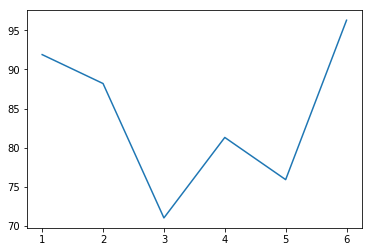

In [0]:
plt.plot([1,2,3,4,5,6], [91.9, 88.2, 71, 81.3, 75.9, 96.3])

In [0]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))


In [0]:
training_data = []
img_size = 244
    
DATADIR = "drive/My Drive/separated_imgs/train/"
CATEGORIES = ["c0/","c1/","c2/","c3/","c4/"]
'''
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
        print('loading...')
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        for img in glob.glob(path+ "*"):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE) #os.path.join(img), cv2.IMREAD_GRAYSCALE)<<<<<<<<<<-
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])

            except Exception as e:
                print(e)
        

        for img in glob.glob(path+ "*"):#adicionando imagens flipadas.
            try:
                img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
                flipped_array = np.fliplr(img_array)
                flipped_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([flipped_array, class_num])
            except Exception as e:
                print(e)
'''
def create_training_data():

  for category in CATEGORIES:  # do dogs and cats
      print('loading...')
      path = os.path.join(DATADIR,category)  # create path to dogs and cats
      class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
      for img in glob.glob(path+ "*"):  # iterate over each image per dogs and cats
          try:
              img_array = cv2.imread(img, cv2.IMREAD_REDUCED_COLOR_8) #os.path.join(img), cv2.IMREAD_GRAYSCALE)<<<<<<<<<<-
              new_array = cv2.resize(img_array, (img_size, img_size),3)
              
              #equ_r = clahe.apply(new_array[:,:,0])
              #equ_g = clahe.apply(new_array[:,:,1])
              #equ_b = clahe.apply(new_array[:,:,2])
              
              new_array = cv2.merge((clahe.apply(new_array[:,:,0]),clahe.apply(new_array[:,:,1]),clahe.apply(new_array[:,:,2])))
              #new_array = equ_r
              training_data.append([new_array, class_num])
          except Exception as e:
              print(e)

create_training_data()


random.shuffle(training_data)

loading...


In [0]:

testing_data = []

DATADIR2 = "drive/My Drive/separated_imgs/val/"

def create_testing_data():
  for category in CATEGORIES:
    print('loading, my dude...')
    path = os.path.join(DATADIR2, category)
    class_num = CATEGORIES.index(category)
    for img in glob.glob(path+ "*"):
        try:
              img_array = cv2.imread(img, cv2.IMREAD_REDUCED_COLOR_8) #os.path.join(img), cv2.IMREAD_GRAYSCALE)<<<<<<<<<<-
              new_array = cv2.resize(img_array, (img_size, img_size),3)
              
              #equ_r = clahe.apply(new_array[:,:,0])
              #equ_g = clahe.apply(new_array[:,:,1])
              #equ_b = clahe.apply(new_array[:,:,2])
              
              new_array = cv2.merge((clahe.apply(new_array[:,:,0]),clahe.apply(new_array[:,:,1]),clahe.apply(new_array[:,:,2])))
              #equalizando histograma
              #new_array = equ_r
              testing_data.append([new_array, class_num])
        except Exception as e:
          print(e)
create_testing_data()

In [0]:
#training data
    
x_train = []
y_train = []
    
for features,label in training_data:
  x_train.append(features)
  y_train.append(label)
    
x_train = np.array(x_train).reshape(-1, img_size, img_size, 3)



x_train = np.true_divide(x_train, 255.0)



In [0]:
x_train.shape

In [0]:
#test data
x_test = []
y_test = []
    
for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)
    
x_test = np.array(x_test).reshape(-1, img_size, img_size, 3)

x_test = np.true_divide(x_test, 255.0)

In [0]:
x_test.shape

(3224, 244, 244, 1)

Type one, no batch-normalization

In [0]:
#type 1 without batch-normalization

es = EarlyStopping(monitor='val_loss',
                   mode='min' ,
                   verbose=1,
                  patience=3)


model_type_1_0 = Sequential()

model_type_1_0.add(Conv2D(64, (3,3),
          padding='same',
          input_shape=x_train.shape[1:], activation='relu'))#64

model_type_1_0.add(MaxPooling2D(pool_size=(2,2)))#M

model_type_1_0.add(Flatten())

model_type_1_0.add(Dense(100))

model_type_1_0.add(ReLU())

model_type_1_0.add(Dropout(0.5))

model_type_1_0.add(Dense(100))

model_type_1_0.add(Dense(5, activation='softmax'))

#model_type_1_0.add(Softmax())

sgd = tf.keras.optimizers.SGD(lr=0.01,
                           decay=0.0,
                           momentum=0.9,
                           nesterov=True)

model_type_1_0.compile(loss='sparse_categorical_crossentropy',
                       optimizer=sgd,
                       metrics=['accuracy'])


since = time.time()


history_1_0 = model_type_1_0.fit(x_train, y_train, batch_size=16,
                  epochs=15,
                  callbacks=[es],
                  validation_split=0.1)

time_elapsed = time.time() - since

print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 35s 5ms/sample - loss: 1.1346 - acc: 0.5175 - val_loss: 0.1580 - val_acc: 0.9437
Epoch 2/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.2798 - acc: 0.8961 - val_loss: 0.0517 - val_acc: 0.9848
Epoch 3/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.1358 - acc: 0.9519 - val_loss: 0.0054 - val_acc: 0.9988
Epoch 4/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.0978 - acc: 0.9647 - val_loss: 0.0180 - val_acc: 0.9941
Epoch 5/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.0685 - acc: 0.9769 - val_loss: 0.0084 - val_acc: 0.9965
Epoch 6/15
7668/7668 [==============================] - 34s 4ms/sample - loss: 0.0524 - acc: 0.9827 - val_loss: 0.0158 - val_acc: 0.9930
Epoch 00006: early stopping
Training complete in 3m 28s


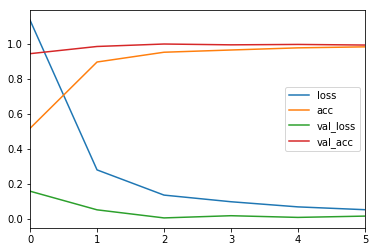

In [0]:

import pandas as pd


pd.DataFrame(history_1_0.history).plot()

In [0]:
model_type_1_0.evaluate(x_test,y_test,
                        batch_size=16,
                        verbose=1,
                        steps=None)

3224/3224 [==============================] - 7s 2ms/sample - loss: 4.5339 - acc: 0.3626


[4.533894222812084, 0.36259305]

In [0]:
y_pred_1_0 = model_type_1_0.predict(x_test)
y_pred_1_0 = y_pred_1_0.argmax(axis=1)

In [0]:
from sklearn import metrics

confusion_1_0 = metrics.confusion_matrix(y_test,y_pred_1_0)
confusion_1_0

array([[265, 252,   2, 139,  35],
       [  5, 438,   2, 201,   0],
       [ 66, 374,  88, 108,  15],
       [ 82, 280,   0, 231,  20],
       [227, 191,   2,  54, 147]])

In [0]:
print(metrics.classification_report(y_test,y_pred_1_0))

              precision    recall  f1-score   support

           0       0.41      0.38      0.40       693
           1       0.29      0.68      0.40       646
           2       0.94      0.14      0.24       651
           3       0.32      0.38      0.34       613
           4       0.68      0.24      0.35       621

    accuracy                           0.36      3224
   macro avg       0.52      0.36      0.35      3224
weighted avg       0.52      0.36      0.35      3224



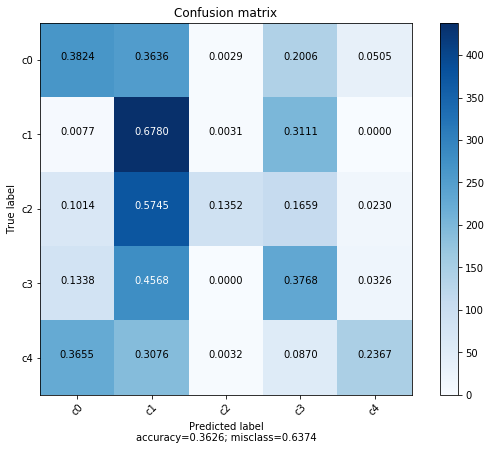

In [0]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
plot_confusion_matrix(confusion_1_0,['c0','c1','c2','c3','c4'])

In [0]:
model_json = model_type_1_0.to_json()

with open('model_type_1_0','w') as json_file:
  json_file.write(model_json)
  
model_type_1_0.save_weights('model_type_1_0.h5')

Type one, with batch-normalization.

In [0]:
#type 1 with batch-normalization
model_type_1_1 = Sequential()

es = EarlyStopping(monitor='val_loss',
                   mode='min' ,
                   verbose=1,
                  patience=3)


model_type_1_1.add(Conv2D(64, (3,3),
          padding='same',
          input_shape=x_train.shape[1:],
                 activation='relu'))#64

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)


model_type_1_1.add(MaxPooling2D(pool_size=(2,2)))#m


model_type_1_1.add(Flatten())

model_type_1_1.add(Dense(100))

model_type_1_1.add(ReLU())

model_type_1_1.add(Dropout(0.5))

model_type_1_1.add(Dense(100))

model_type_1_1.add(Dense(5, activation='softmax'))

#model_type_1_1.add(Softmax())


'''
model_type_1_1.add(Dense(16, activation='softmax'))
'''

model_type_1_1.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])


since = time.time()


history_1_1 = model_type_1_1.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.1,
          callbacks=[es])


time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 32s 4ms/sample - loss: 1.2601 - acc: 0.5126 - val_loss: 0.8258 - val_acc: 0.6319
Epoch 2/15
7668/7668 [==============================] - 32s 4ms/sample - loss: 0.2601 - acc: 0.9351 - val_loss: 0.0376 - val_acc: 1.0000
Epoch 3/15
7668/7668 [==============================] - 32s 4ms/sample - loss: 0.0789 - acc: 0.9827 - val_loss: 0.0134 - val_acc: 1.0000
Epoch 4/15
7668/7668 [==============================] - 32s 4ms/sample - loss: 0.0380 - acc: 0.9924 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 5/15
7668/7668 [==============================] - 31s 4ms/sample - loss: 0.0297 - acc: 0.9944 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 6/15
7668/7668 [==============================] - 32s 4ms/sample - loss: 0.0182 - acc: 0.9971 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 7/15
7668/7668 [==============================] - 31s 4ms/sample - loss: 0.0166 - acc: 0.9970 - val_loss: 0.0017 - val_acc: 1

In [0]:
model_type_1_1.evaluate(x_test,y_test,
                        batch_size=16,verbose=1,
                       steps=None)

3224/3224 [==============================] - 7s 2ms/sample - loss: 6.0851 - acc: 0.3573


[6.08508434081011, 0.3573201]

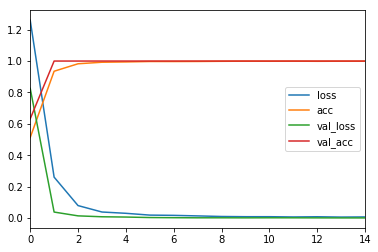

In [0]:
pd.DataFrame(history_1_1.history).plot()

In [0]:
y_pred_1_1 = model_type_1_1.predict(x_test)
print(metrics.classification_report(y_test, y_pred_1_1.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.50      0.18      0.26       693
           1       0.25      0.96      0.39       646
           2       1.00      0.11      0.20       651
           3       0.78      0.32      0.45       613
           4       0.93      0.23      0.37       621

    accuracy                           0.36      3224
   macro avg       0.69      0.36      0.34      3224
weighted avg       0.69      0.36      0.33      3224



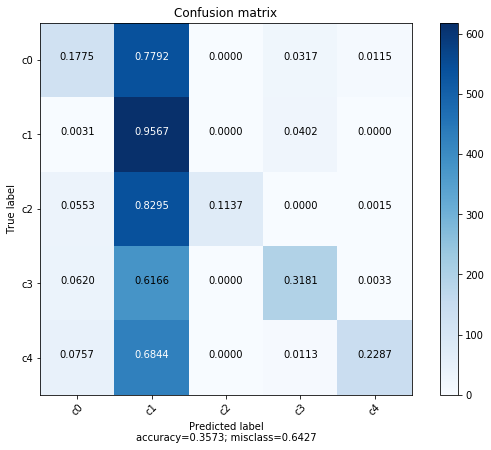

In [0]:
plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred_1_1.argmax(axis=1)),['c0','c1','c2','c3','c4'])

In [0]:
model_json = model_type_1_1.to_json()

with open('model_type_1_1','w') as json_file:
  json_file.write(model_json)
  
model_type_1_1.save_weights('model_type_1_1.h5')

type two, no batch-normalization

In [0]:
model_type_2_0 = Sequential()#type 2 without batch-normalization

es = EarlyStopping(monitor='val_loss',
                   mode='min' ,
                   verbose=1,
                  patience=3)


model_type_2_0.add(Conv2D(64, (3,3),
          padding='same',
          input_shape=x_train.shape[1:],
                 activation='relu'))#64

model_type_2_0.add(Conv2D(32, (3,3),
                padding='same',
                activation='relu'))#32

model_type_2_0.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling layer



model_type_2_0.add(Flatten())

'''
model_type_2_0.add(Dense(16, activation='softmax'))
'''

model_type_2_0.add(Dense(100))

model_type_2_0.add(ReLU())

model_type_2_0.add(Dropout(0.5))

model_type_2_0.add(Dense(100))

model_type_2_0.add(Dense(5, activation='softmax'))

#model_type_2_0.add(Softmax())


model_type_2_0.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

since = time.time()

history_2_0 = model_type_2_0.fit(x_train, y_train,
                   batch_size=16,
                   epochs=15,
                   validation_split=0.1)

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Train on 7668 samples, validate on 853 samples
Epoch 1/15
1056/7668 [===>..........................] - ETA: 33s - loss: 1.6127 - acc: 0.2405

KeyboardInterrupt: ignored

In [0]:
model_type_2_0.evaluate(x_test,y_test,
                        batch_size=16,verbose=1,
                       steps=None)


3224/3224 [==============================] - 7s 2ms/sample - loss: 1.6080 - acc: 0.2150


[1.6079573882720606, 0.21495037]

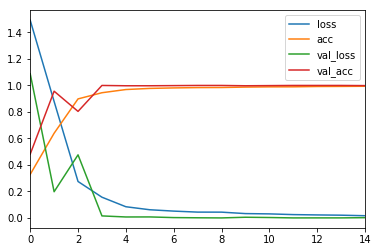

In [0]:
pd.DataFrame(history_2_0.history).plot()

In [0]:
y_pred_2_0 = model_type_2_0.predict(x_test)
print(metrics.classification_report(y_test, y_pred_2_0.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.21      1.00      0.35       693
           1       0.00      0.00      0.00       646
           2       0.00      0.00      0.00       651
           3       0.00      0.00      0.00       613
           4       0.00      0.00      0.00       621

    accuracy                           0.21      3224
   macro avg       0.04      0.20      0.07      3224
weighted avg       0.05      0.21      0.08      3224



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


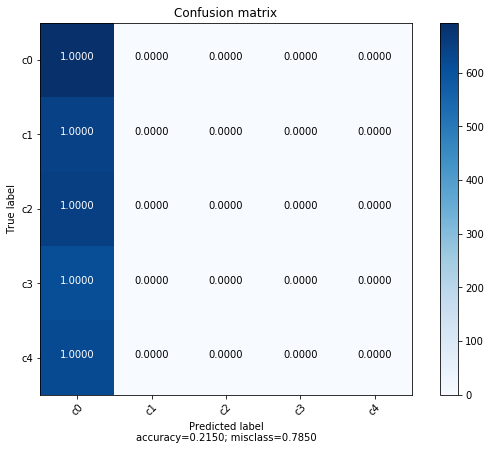

In [0]:
plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred_2_0.argmax(axis=1)),['c0','c1','c2','c3','c4'])

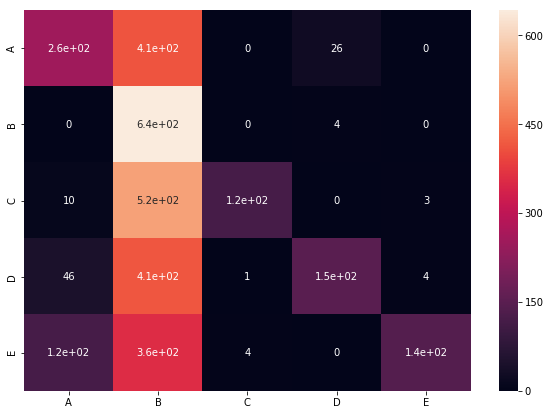

In [0]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
def plot_one_label_CM(array):
  df_cm = pd.DataFrame(array, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)
  
plot_one_label_CM(metrics.confusion_matrix(y_test,y_pred_2_0.argmax(axis=1)))

In [0]:
model_json = model_type_2_0.to_json()

with open('model_type_2_0','w') as json_file:
  json_file.write(model_json)
  
model_type_2_0.save_weights('model_type_2_0.h5')

type three, with batch-normalization

In [0]:
#type 3 with batch-normalization
model_type_3_1 = Sequential()

model_type_3_1.add(Conv2D(128, (3,3),
                   padding='same',
                   input_shape=x_train.shape[1:],
                   activation='relu'))#128

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(Conv2D(64, (3,3),
                   padding='same',
                   activation='relu'))#64


keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(MaxPooling2D(pool_size=(2,2)))#M


model_type_3_1.add(Conv2D(64, (3,3),
                   padding='same',
                   activation='relu'))#64

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(Conv2D(32, (3,3),
                   padding='same',
                   activation='relu'))#32

keras.layers.BatchNormalization(axis=1,
                                momentum=0.9,
                                epsilon=0.001,
                                center=True,
                                scale=True,
                                beta_initializer='zeros',
                                gamma_initializer='ones',
                                moving_mean_initializer='zeros',
                                moving_variance_initializer='ones',
                                beta_regularizer=None,
                                gamma_regularizer=None,
                                beta_constraint=None,
                                gamma_constraint=None)#B

model_type_3_1.add(MaxPooling2D(pool_size=(2,2)))#M


model_type_3_1.add(Flatten())

'''
model_type_3_1.add(Dense(16, activation='softmax'))
'''

model_type_3_1.add(Dense(100))

model_type_3_1.add(ReLU())

model_type_3_1.add(Dropout(0.5))

model_type_3_1.add(Dense(100))

model_type_3_1.add(Dense(5, activation='softmax'))

#model_type_3_1.add(Softmax())

model_type_3_1.compile(loss='sparse_categorical_crossentropy',
                       optimizer='sgd',
                       metrics=['accuracy']
                      )


since = time.time()


history_3_1 = model_type_3_1.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.1)


time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Train on 7668 samples, validate on 853 samples
Epoch 1/15
7668/7668 [==============================] - 80s 10ms/sample - loss: 1.5306 - acc: 0.2981 - val_loss: 1.3617 - val_acc: 0.3494
Epoch 2/15
7668/7668 [==============================] - 81s 11ms/sample - loss: 0.9005 - acc: 0.6321 - val_loss: 0.2286 - val_acc: 0.9308
Epoch 3/15
7668/7668 [==============================] - 81s 11ms/sample - loss: 0.2828 - acc: 0.8998 - val_loss: 0.7664 - val_acc: 0.7796
Epoch 4/15
7668/7668 [==============================] - 81s 11ms/sample - loss: 0.1292 - acc: 0.9553 - val_loss: 0.0182 - val_acc: 0.9930
Epoch 5/15
7668/7668 [==============================] - 81s 11ms/sample - loss: 0.0811 - acc: 0.9742 - val_loss: 0.0302 - val_acc: 0.9871
Epoch 6/15
7668/7668 [==============================] - 81s 11ms/sample - loss: 0.0510 - acc: 0.9820 - val_loss: 0.0090 - val_acc: 0.9977
Epoch 7/15
7668/7668 [==============================] - 81s 11ms/sample - loss: 0.0428 - acc: 0.9841 - val_loss: 0.0046 - val

In [0]:
model_type_3_1.evaluate(x_test,y_test,
                        batch_size=128,
                        verbose=1,
                       steps=None)

3224/3224 [==============================] - 12s 4ms/sample - loss: 13.1492 - acc: 0.4197


[13.149206144462521, 0.419665]

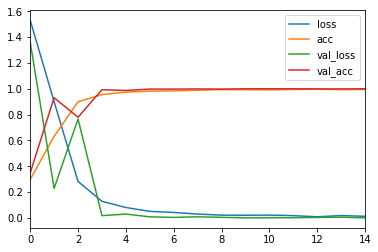

In [0]:
pd.DataFrame(history_3_1.history).plot()

In [0]:
y_pred_3_1 = model_type_3_1.predict(x_test)
print(metrics.classification_report(y_test, y_pred_3_1.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.45      0.46      0.46       693
           1       0.30      1.00      0.47       646
           2       0.97      0.17      0.29       651
           3       0.99      0.23      0.37       613
           4       0.95      0.23      0.37       621

    accuracy                           0.42      3224
   macro avg       0.73      0.42      0.39      3224
weighted avg       0.73      0.42      0.39      3224



In [0]:
acc = metrics.accuracy_score(y_test, y_pred_3_1.argmax(axis=1))
acc

0.41966501240694787

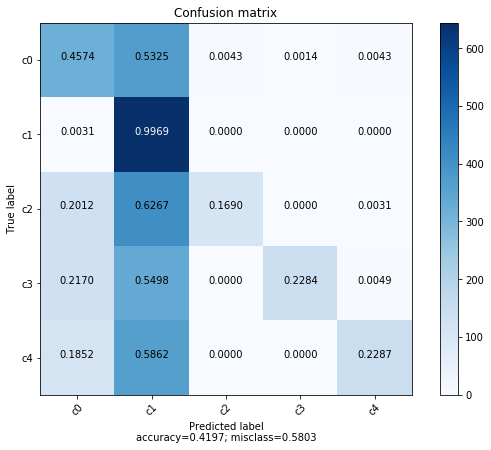

In [0]:
plot_confusion_matrix(metrics.confusion_matrix(y_test,y_pred_3_1.argmax(axis=1)),['c0','c1','c2','c3','c4'])

In [0]:
 model_json = model_type_3_1.to_json()
with open('model_type_3_1','w') as json_file:
  json_file.write(model_json)
  
model_type_3_1.save_weights('model_type_3_1.h5')